In [97]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [98]:
data = pd.read_csv("data/lab7/data.csv")
data

,Квартал,"Объем платных услуг населению, млн. руб."
0,1,2428
1,2,2010
2,3,2981
3,4,3074
4,5,2893
5,6,3198
6,7,3250
7,8,3495
8,9,3528
9,10,3838


Построим график распределения целевых значений

Text(0.5, 1.0, 'График распределения объема платных устуг населению по кварталам')

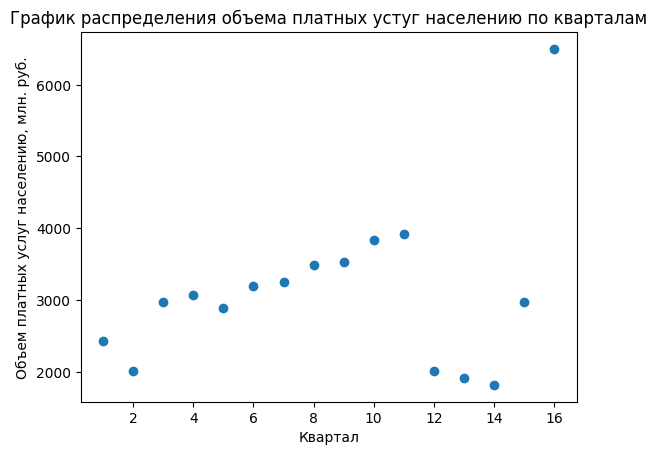

In [99]:
plt.scatter(x=data["Квартал"],y=data["Объем платных услуг населению, млн. руб."])
plt.xlabel("Квартал")
plt.ylabel("Объем платных услуг населению, млн. руб.")
plt.title("График распределения объема платных устуг населению по кварталам")

### 1. Построение Boxplot

Text(0, 0.5, 'Объем платных услуг населению, млн. руб.')

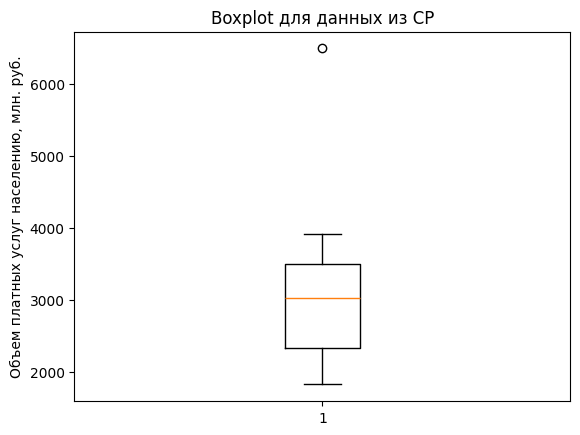

In [100]:
plt.boxplot(x=data["Объем платных услуг населению, млн. руб."])
plt.title("Boxplot для данных из СР")
plt.ylabel("Объем платных услуг населению, млн. руб.")

### 2. Поиск пропущенного значения

In [101]:
# Вставим вместо 5 значения NaN
data["Объем платных услуг населению, млн. руб."][5] = np.nan
data

/tmp/ipykernel_397161/740415917.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["Объем платных услуг населению, млн. руб."][5] = np.nan


,Квартал,"Объем платных услуг населению, млн. руб."
0,1,2428.0
1,2,2010.0
2,3,2981.0
3,4,3074.0
4,5,2893.0
5,6,NaN
6,7,3250.0
7,8,3495.0
8,9,3528.0
9,10,3838.0


Востановим значения через интерполяция

In [102]:
data["Объем платных услуг населению, млн. руб."][5] = np.nan
data["Объем платных услуг населению, млн. руб."]=data["Объем платных услуг населению, млн. руб."].interpolate()
data

,Квартал,"Объем платных услуг населению, млн. руб."
0,1,2428.0
1,2,2010.0
2,3,2981.0
3,4,3074.0
4,5,2893.0
5,6,3071.5
6,7,3250.0
7,8,3495.0
8,9,3528.0
9,10,3838.0


### 3. Посмотрим цикличность данных

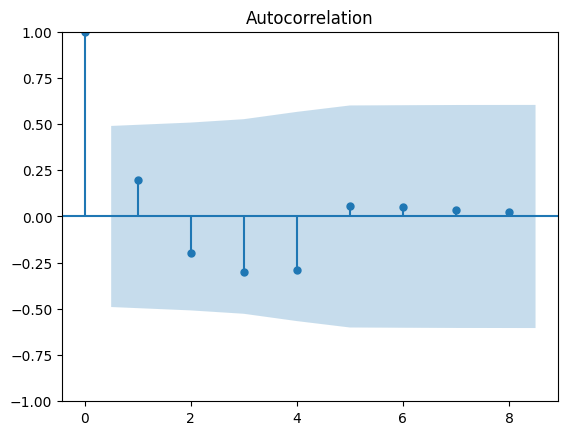

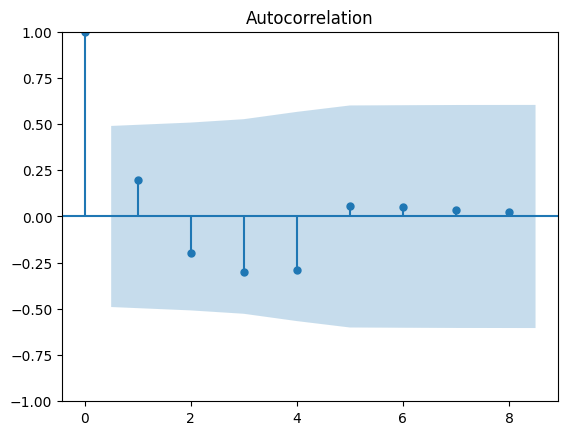

In [103]:
plot_acf(data["Объем платных услуг населению, млн. руб."])

### 4. ARIMA

In [104]:
from statsmodels.tsa.arima.model import ARIMA
order = (2, 1, 2)

In [105]:
forecaster = ARIMA(data["Объем платных услуг населению, млн. руб."], order=order)
forecaster = forecaster.fit()

/home/ivan/ЧелГУ/Анализ данных/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [106]:
forecast = forecaster.forecast(steps=2)
forecast

16    7105.400627
17    6927.843465
Name: predicted_mean, dtype: float64

In [96]:
def get_start(df:pd.DataFrame)->int:
    return min(df["Квартал"])

def get_end(df:pd.DataFrame)->int:
    return max(df["Квартал"])

In [107]:
get_start(data)

1